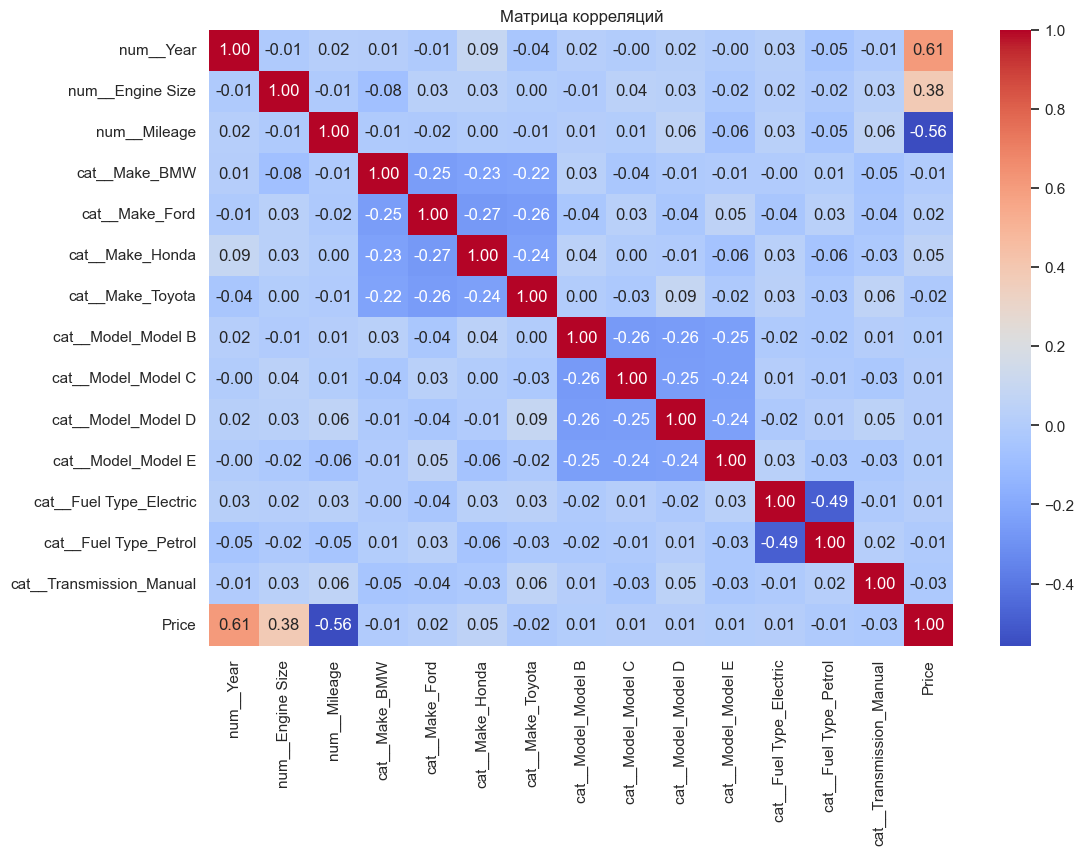

VIF:
                     feature       VIF
0                  num__Year  1.012704
1           num__Engine Size  1.011298
2               num__Mileage  1.013793
3              cat__Make_BMW  1.479782
4             cat__Make_Ford  1.616119
5            cat__Make_Honda  1.537416
6           cat__Make_Toyota  1.586037
7         cat__Model_Model B  1.622102
8         cat__Model_Model C  1.565908
9         cat__Model_Model D  1.616662
10        cat__Model_Model E  1.507244
11   cat__Fuel Type_Electric  1.704582
12     cat__Fuel Type_Petrol  1.684870
13  cat__Transmission_Manual  1.860050

Линейная регрессия:
RMSE: 2237.29
R²: 0.82
MAPE: 0.08

Гребневая регрессия:
RMSE: 2236.73
R²: 0.82
MAPE: 0.08

Кросс-валидация (R²):
Линейная регрессия: 0.83
Гребневая регрессия: 0.83


In [7]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np
from data_preparation import X_processed, y
from regression_models import evaluate_model, y_pred_lin, y_pred_ridge

Разделяем данные на тренировочные и тестовые

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

Применяем PCA — оставим столько компонент, чтобы сохранялось 95% дисперсии.
PCA применяется только после разбиения данных,
чтобы модель заранее не видела тестовые данные и это не повлияло на направление главных компонент

In [9]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Исходное количество признаков: {X_train.shape[1]}")
print(f"После PCA: {X_train_pca.shape[1]} компонентов")

Исходное количество признаков: 14
После PCA: 11 компонентов


Создаем линейную регрессию после PCA, обучаем её тренировочными данными
и предсказываем значения для тестовых данных 

In [10]:
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)
y_pred_lin_pca = lin_reg_pca.predict(X_test_pca)

Аналогично делаем для гребневой регрессии

In [11]:
ridge_reg_pca = Ridge(alpha=1.0)
ridge_reg_pca.fit(X_train_pca, y_train)
y_pred_ridge_pca = ridge_reg_pca.predict(X_test_pca)

Проводим оценку качества

In [12]:
evaluate_model(y_test, y_pred_lin, "Линейная регрессия")
evaluate_model(y_test, y_pred_lin_pca, "Линейная регрессия (PCA)")
evaluate_model(y_test, y_pred_ridge, "Гребневая регрессия")
evaluate_model(y_test, y_pred_ridge_pca, "Гребневая регрессия (PCA)")


Линейная регрессия:
RMSE: 2237.29
R²: 0.82
MAPE: 0.08

Линейная регрессия (PCA):
RMSE: 2234.47
R²: 0.82
MAPE: 0.08

Гребневая регрессия:
RMSE: 2236.73
R²: 0.82
MAPE: 0.08

Гребневая регрессия (PCA):
RMSE: 2233.97
R²: 0.82
MAPE: 0.08
